# aSPEM Experiment : analysis




In [1]:
%run 0_parameters.ipynb


WELCOME



In [2]:
if not os.path.exists('figures/Result'):
    os.makedirs('figures/Result')

In [3]:
t_titre = 35
t_label = 25
fig_width= 15
exts = ['.svg'] #'.png', '.svg', '.pdf']
dpi = 400

In [4]:
msfigpath = '../PasturelMontagniniPerrinet2019/figures'
observer = None #'AM'
mode = 'pari'

from aSPEM import Analysis
e = Analysis(observer=observer, mode=mode, name_file_fit='fct_velocity_sigmo')

In [5]:
opt = {'t_titre':80, 't_label':60, 'titre':'', 'color_r':'r'}

proba = 'real', 'bcp'

mode_bcp = 'fixed', 'max', 'expectation', 'mean', 'leaky'

result = 'bet', 'acceleration', 'velocity'

## two representative subjects

In [6]:
N_trials = 200
num_block = 0
sujet = [0, 5]
figname = '2_results_enregistrement'

sujet 0 = AM
sujet 5 = IP


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


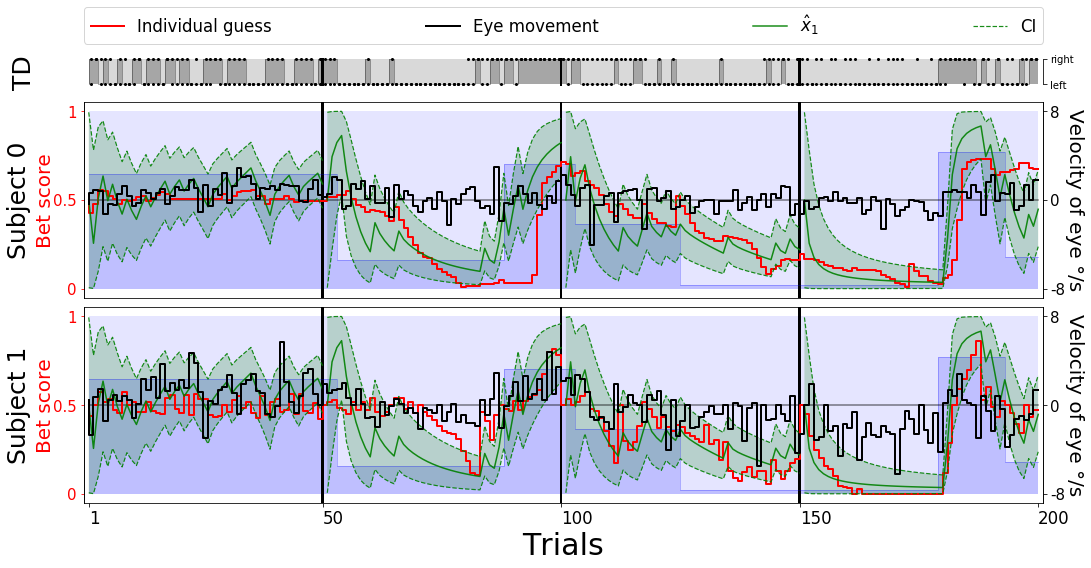

In [7]:
#fig, axs = e.plot_experiment(sujet=sujet, mode='deux', num_block=[1], titre='', lw=2, legends=True)
color=[['k', 'k'], [color_true_p, color_true_p], ['k','none']]
alpha = [[.35,.15],[.25,.1],[1,0]]
fig, axs, p = e.plot_experiment(sujet=sujet, mode='deux', num_block=[num_block],
                                titre='', t_label=30, lw=2, legends=True, color=color,
                                color_bcp=color_bcp_mean, alpha=alpha,
                                TD=True, return_proba=True, mode_bcp='mean')

axs[0].plot(np.arange(1, N_trials)-.5, p[1:, 1, 0], 'k.', ms=4)

offset = .04
for ax in axs: 
    #ax.set_xlim(0, 100)
    #ax.set_ylim(-offset, 1+offset)
    #ax.axis('off')
    for card in ['bottom', 'top']:
        ax.spines[card].set_visible(False)
        #ax.spines[card].set_bounds(0, 1)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_bounds(0, 1)
axs[0].spines['right'].set_position(('axes', 1.0))
    
for ext in exts: fig.savefig('{msfigpath}/{figname}'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)
for ext in exts: fig.savefig('figures/BCP/BCP_mean'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)


sujet 0 = AM
sujet 5 = IP


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


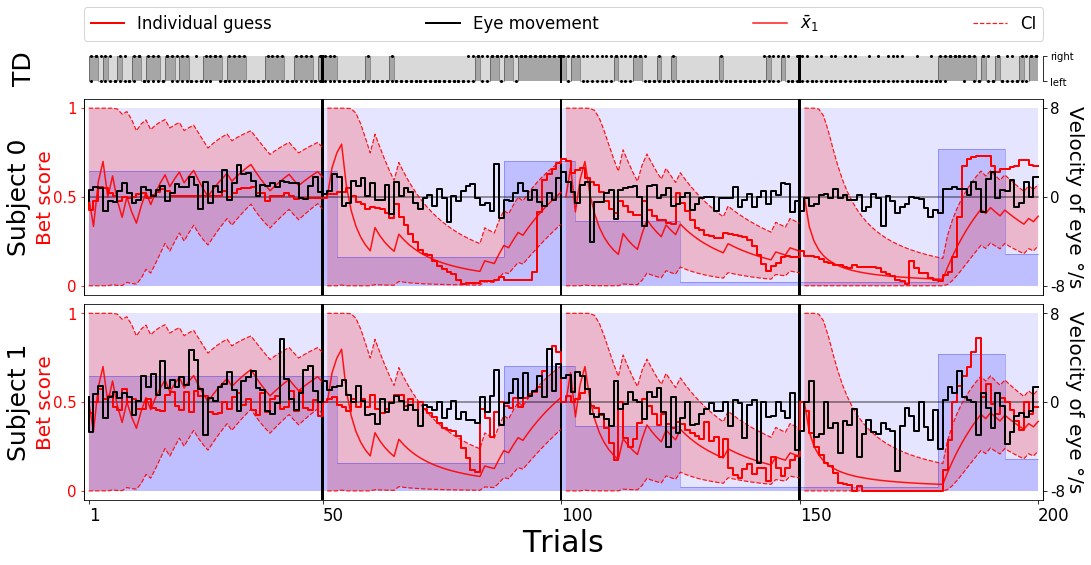

In [8]:
fig, axs, p = e.plot_experiment(sujet=sujet, mode='deux', num_block=[num_block],
                                titre='', t_label=30, lw=2, legends=True, color=color,
                                color_bcp=color_bcp_fix, alpha=alpha, name_bcp=r'$\bar{x}_1$',
                                TD=True, return_proba=True, mode_bcp='leaky')

axs[0].plot(np.arange(1, N_trials)-.5, p[1:, 1, 0], 'k.', ms=4)

offset = .04
for ax in axs: 
    #ax.set_xlim(0, 100)
    #ax.set_ylim(-offset, 1+offset)
    #ax.axis('off')
    for card in ['bottom', 'top']:
        ax.spines[card].set_visible(False)
        #ax.spines[card].set_bounds(0, 1)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_bounds(0, 1)
axs[0].spines['right'].set_position(('axes', 1.0))
    
for ext in exts: fig.savefig('figures/BCP/BCP_leaky'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)


sujet 0 = AM
sujet 5 = IP


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


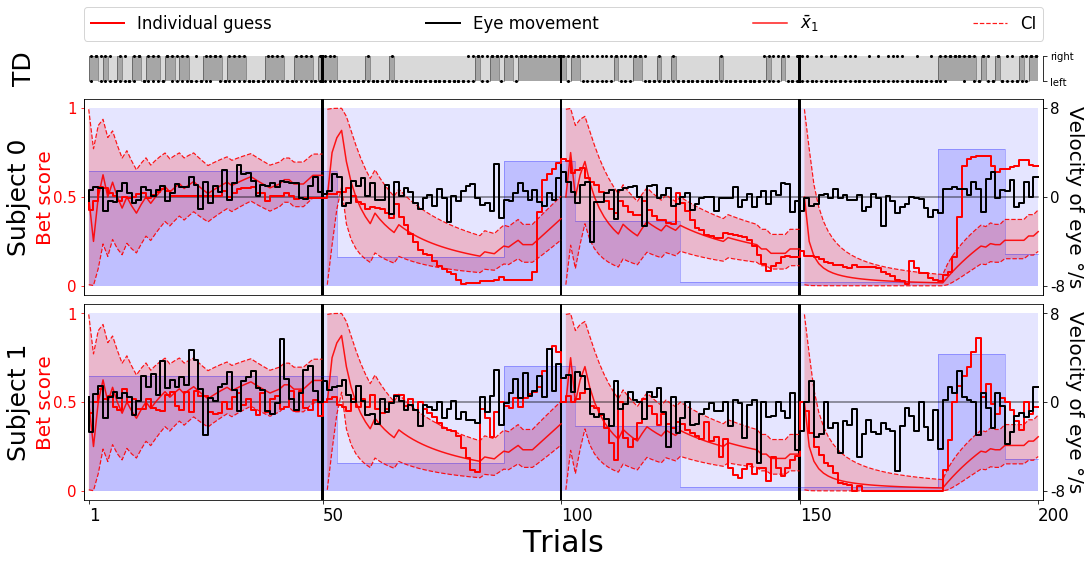

In [9]:
fig, axs, p = e.plot_experiment(sujet=sujet, mode='deux', num_block=[num_block],
                                titre='', t_label=30, lw=2, legends=True, color=color,
                                color_bcp=color_bcp_fix, alpha=alpha, name_bcp=r'$\bar{x}_1$',
                                TD=True, return_proba=True, mode_bcp='fixed')

axs[0].plot(np.arange(1, N_trials)-.5, p[1:, 1, 0], 'k.', ms=4)

offset = .04
for ax in axs: 
    #ax.set_xlim(0, 100)
    #ax.set_ylim(-offset, 1+offset)
    #ax.axis('off')
    for card in ['bottom', 'top']:
        ax.spines[card].set_visible(False)
        #ax.spines[card].set_bounds(0, 1)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_bounds(0, 1)
axs[0].spines['right'].set_position(('axes', 1.0))
    
for ext in exts: fig.savefig('figures/BCP/BCP_fixed'.format(msfigpath=msfigpath, figname=figname) + ext, dpi=400, bbox_inches='tight', pad_inches=0)


## quantitative analysis

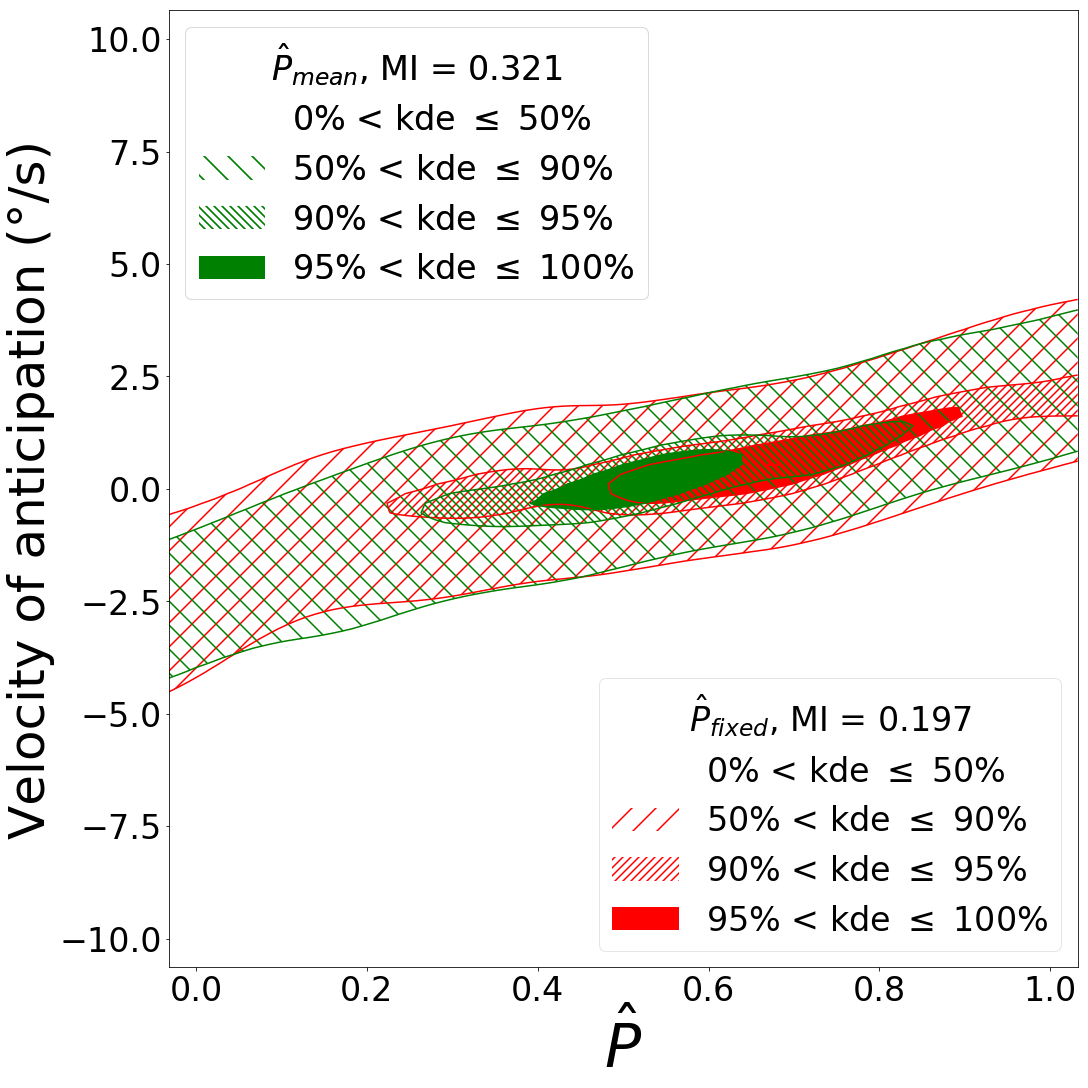

In [10]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
#levels = ['0', '0.5', '0.9', '0.95', '1']
levels = ['0%', '50%', '90%', '95%', '100%']

opt['line_r'] = False
opt['color_r'] = color_bcp_fix

opts_kde = dict(conditional_kde=True,  nb_point_kde=100j)
axs = e.comparison(ax=axs, result='velocity', mode_bcp='fixed', hatch=True, 
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right', **opts_kde, **opt)


opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='velocity', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('{msfigpath}/4_A_result_psycho_aSPEM'.format(msfigpath=msfigpath) + ext, dpi=dpi)
for ext in exts: fig.savefig('figures/BCP/KDE_velo_mean_fixed'.format(msfigpath=msfigpath) + ext, dpi=dpi)

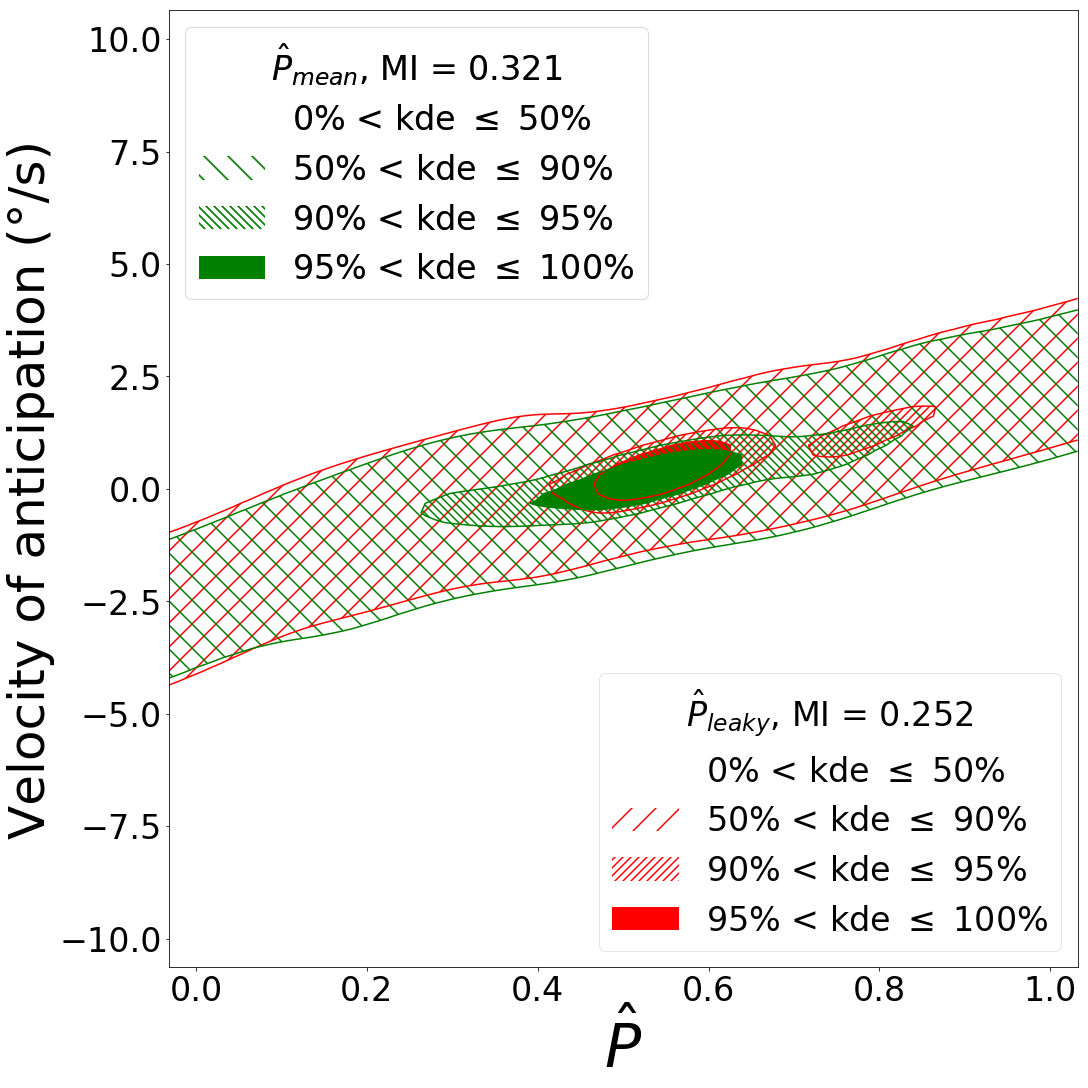

In [11]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
#levels = ['0', '0.5', '0.9', '0.95', '1']
levels = ['0%', '50%', '90%', '95%', '100%']

opt['line_r'] = False
opt['color_r'] = color_bcp_fix

opts_kde = dict(conditional_kde=True,  nb_point_kde=100j)
axs = e.comparison(ax=axs, result='velocity', mode_bcp='leaky', hatch=True, 
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right', **opts_kde, **opt)


opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='velocity', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('{msfigpath}/4_A_result_psycho_aSPEM'.format(msfigpath=msfigpath) + ext, dpi=dpi)
for ext in exts: fig.savefig('figures/BCP/KDE_velo_mean_leaky'.format(msfigpath=msfigpath) + ext, dpi=dpi)

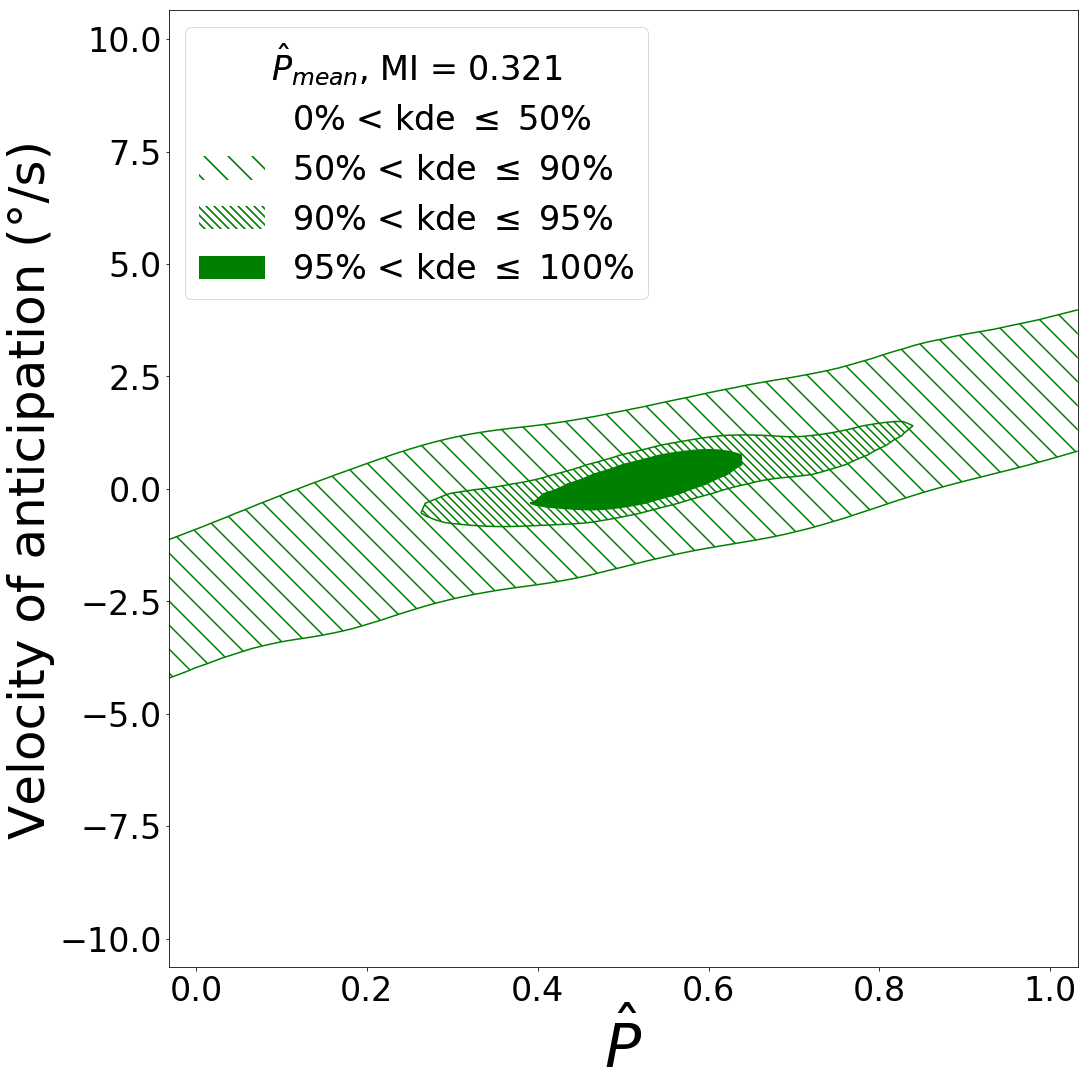

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
levels = ['0%', '50%', '90%', '95%', '100%']
opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='velocity', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_velo_mean'.format(msfigpath=msfigpath) + ext, dpi=dpi)

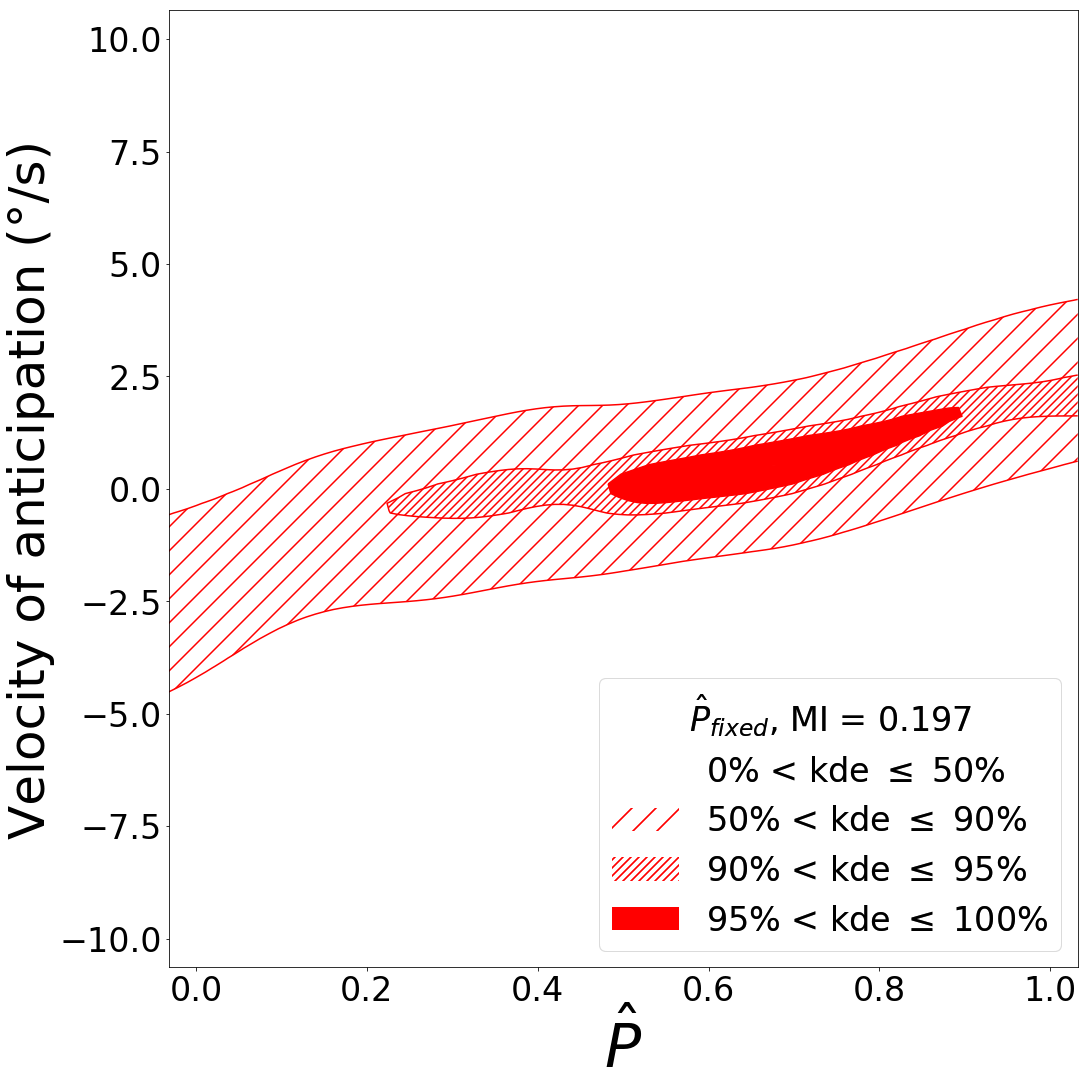

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
levels = ['0%', '50%', '90%', '95%', '100%']
opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='velocity', mode_bcp='fixed', hatch=True, 
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right', **opts_kde, **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_velo_fixed'.format(msfigpath=msfigpath) + ext, dpi=dpi)

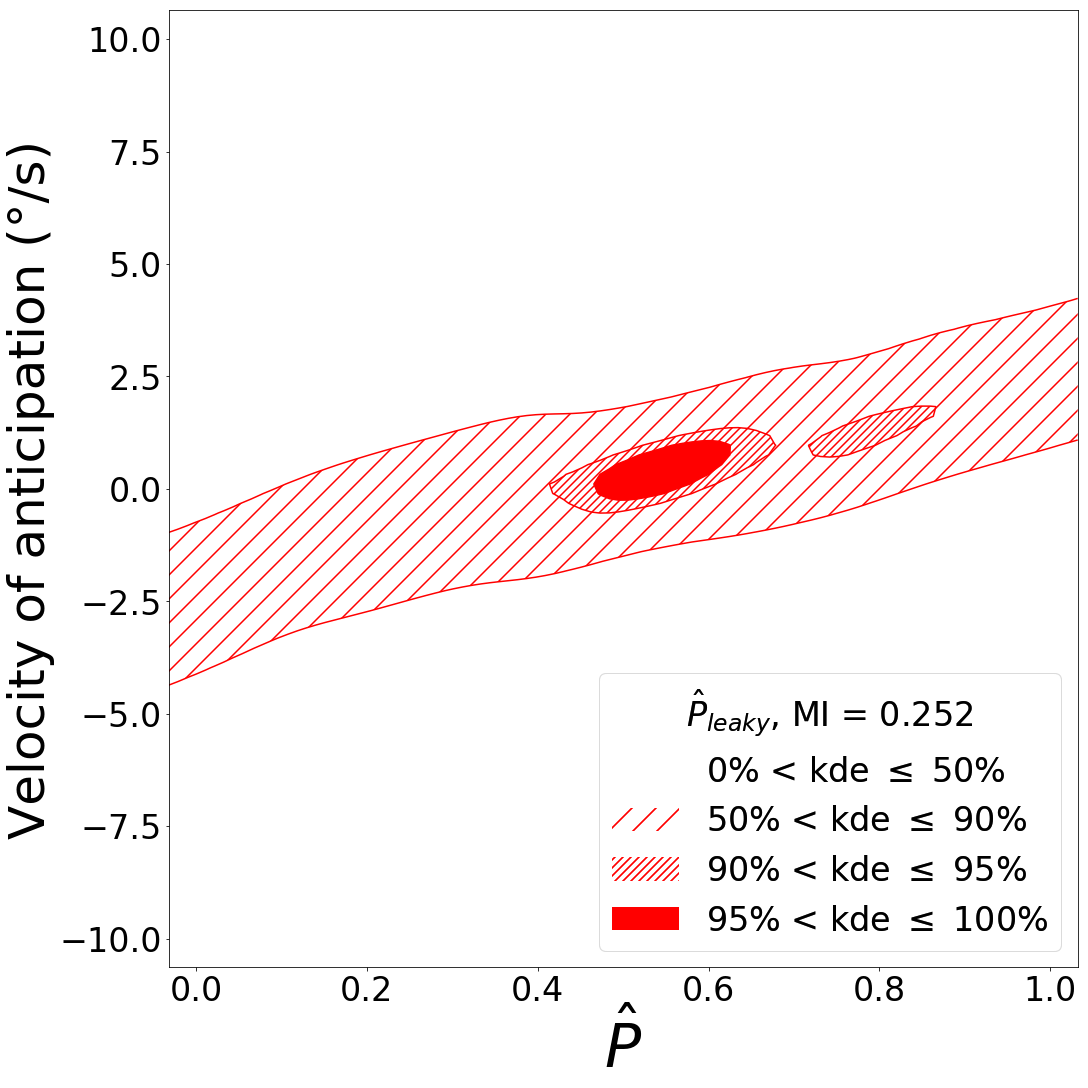

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)
levels = ['0%', '50%', '90%', '95%', '100%']
opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='velocity', mode_bcp='leaky', hatch=True, 
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right', **opts_kde, **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_velo_leaky'.format(msfigpath=msfigpath) + ext, dpi=dpi)

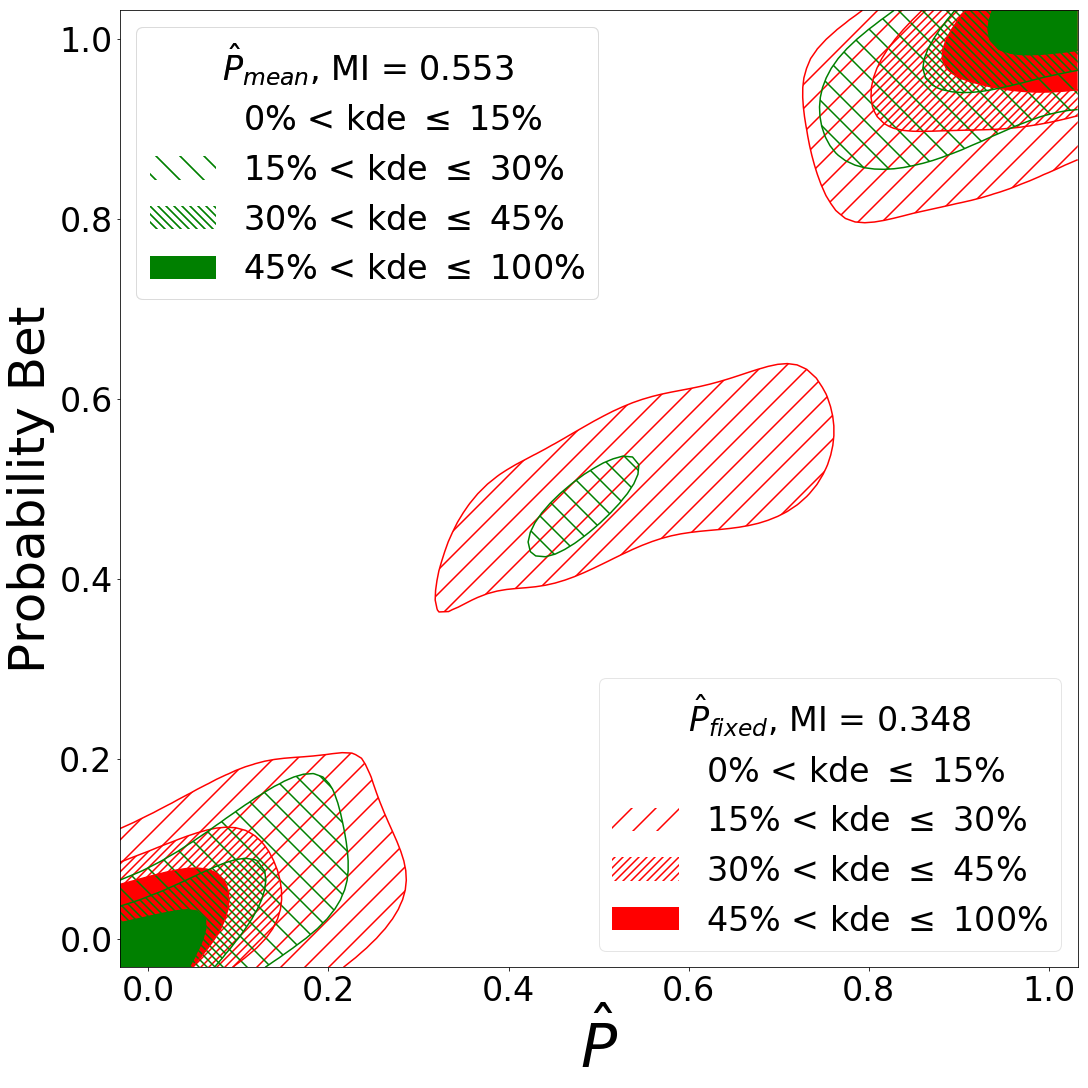

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']

opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='bet', mode_bcp='fixed', hatch=True, hatch_symbol = '/',
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right',  **opts_kde,  **opt)

opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='bet', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('{msfigpath}/4_B_result_psycho_bet'.format(msfigpath=msfigpath) + ext, dpi=dpi)
for ext in exts: fig.savefig('figures/BCP/KDE_bet_mean_fixed'.format(msfigpath=msfigpath) + ext, dpi=dpi)

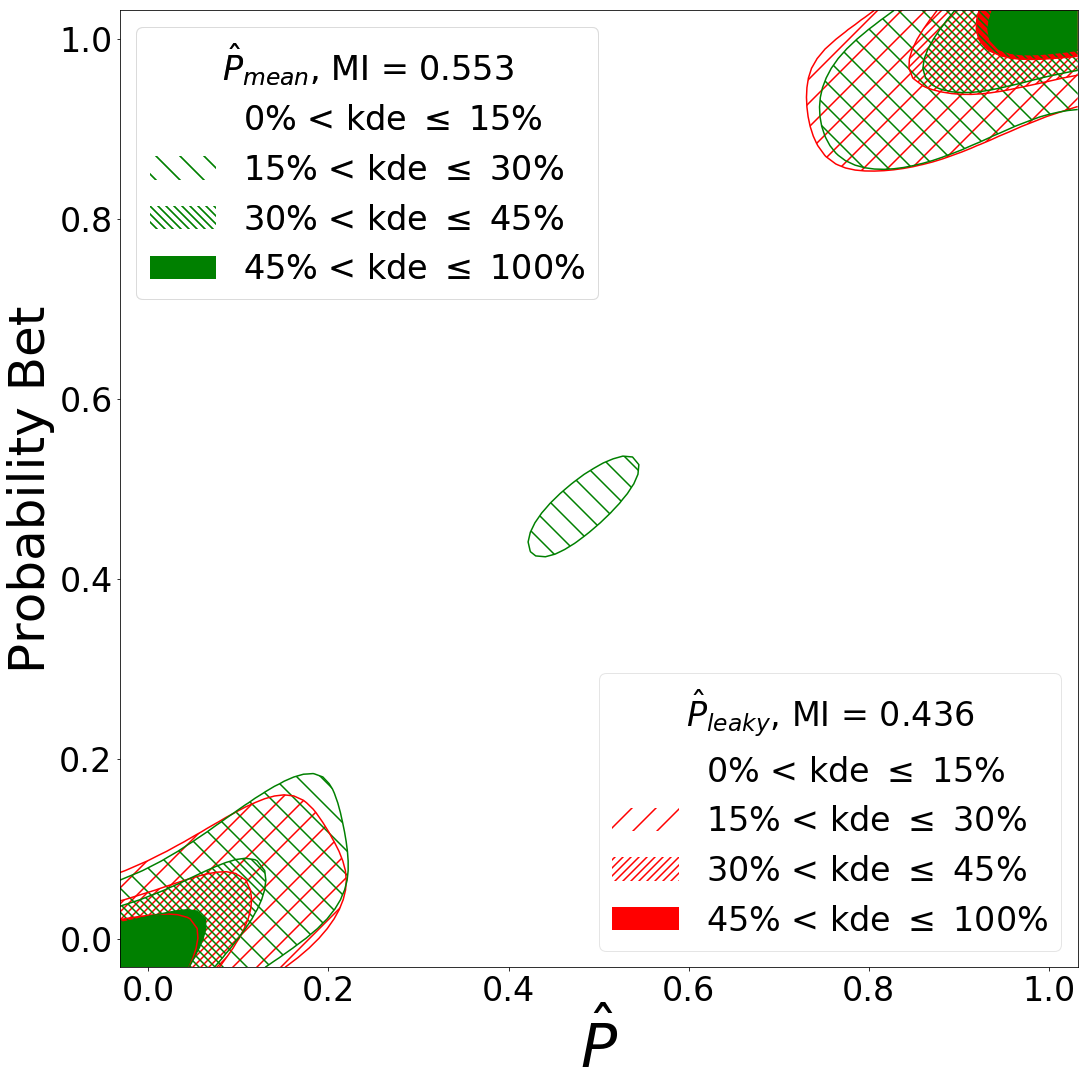

In [16]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']

opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='bet', mode_bcp='leaky', hatch=True, hatch_symbol = '/',
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right',  **opts_kde,  **opt)

opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='bet', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('{msfigpath}/4_B_result_psycho_bet'.format(msfigpath=msfigpath) + ext, dpi=dpi)
for ext in exts: fig.savefig('figures/BCP/KDE_bet_mean_leaky'.format(msfigpath=msfigpath) + ext, dpi=dpi)

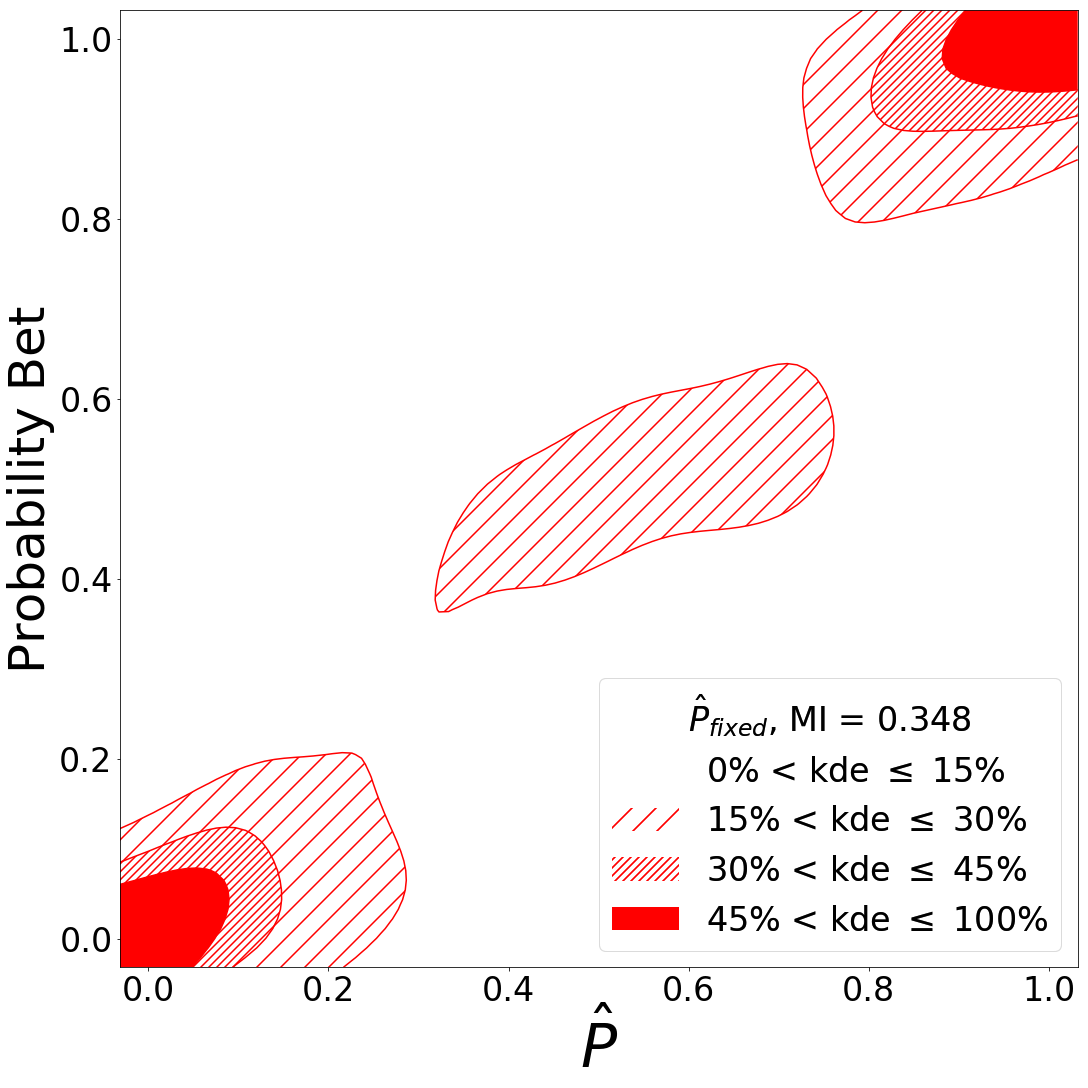

In [17]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']

opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='bet', mode_bcp='fixed', hatch=True, hatch_symbol = '/',
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right',  **opts_kde,  **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_bet_fixed'.format(msfigpath=msfigpath) + ext, dpi=dpi)

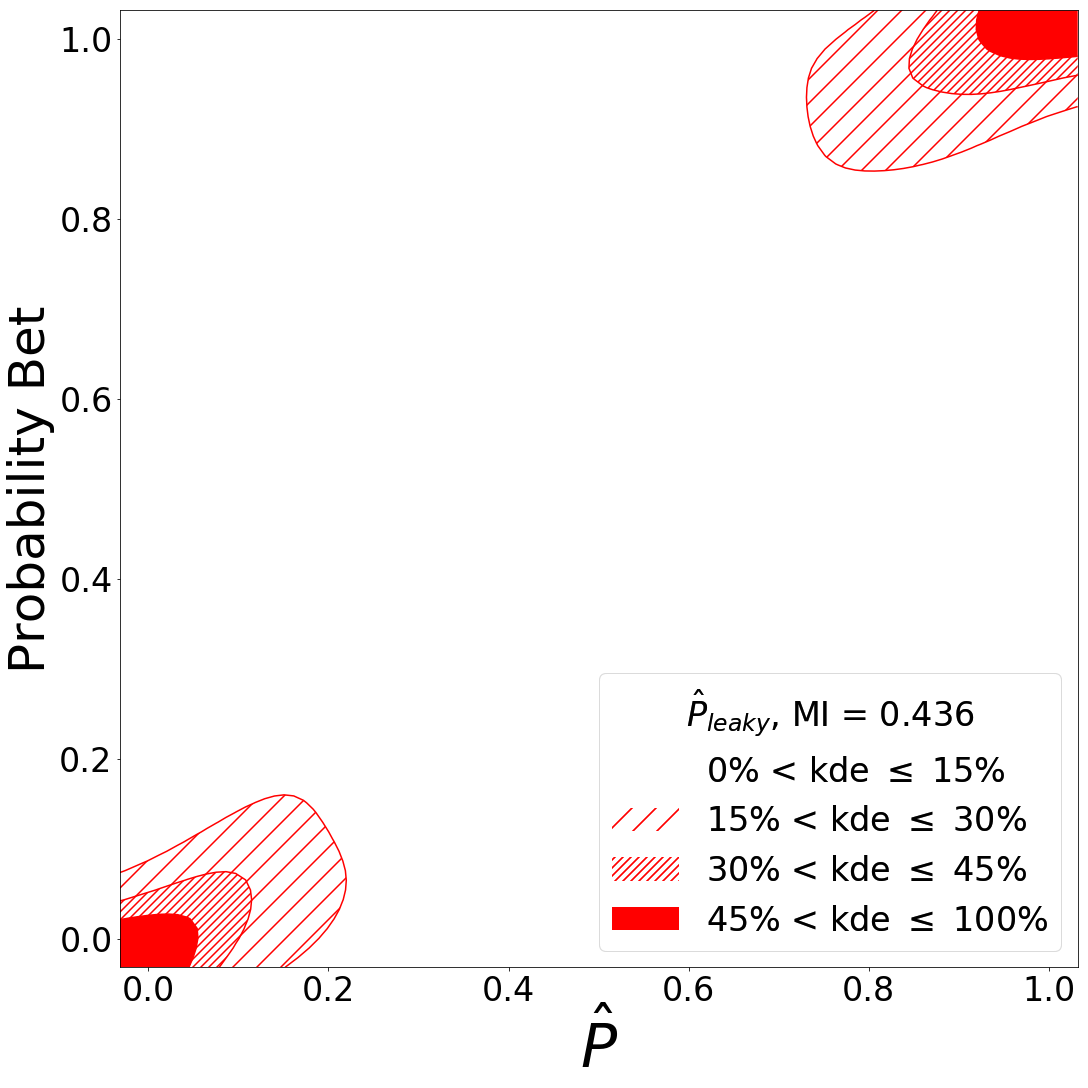

In [18]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']

opt['color_r'] = color_bcp_fix
axs = e.comparison(ax=axs, result='bet', mode_bcp='leaky', hatch=True, hatch_symbol = '/',
                   show='kde', color_kde=color_bcp_fix, alpha=1, levels=levels,
                   pos_r='lower right',  **opts_kde,  **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_bet_leaky'.format(msfigpath=msfigpath) + ext, dpi=dpi)

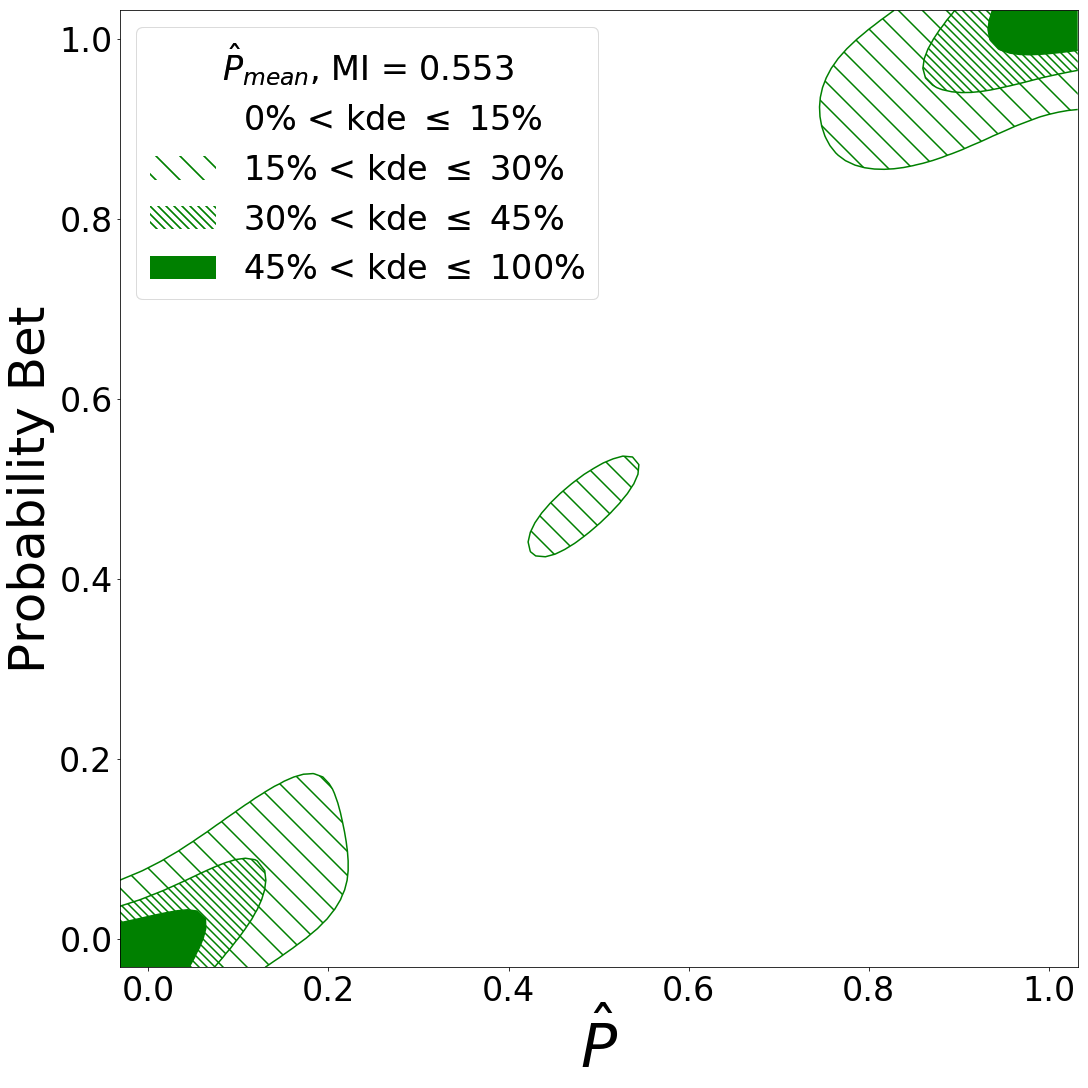

In [19]:
fig, axs = plt.subplots(1, 1, figsize=(15, 15),constrained_layout=True)

levels = ['0%', '15%', '30%', '45%', '100%']


opt['color_r'] = color_bcp_mean
axs = e.comparison(ax=axs, result='bet', show='kde', levels=levels, hatch=True, hatch_symbol = '\\',
                   color_kde=color_bcp_mean, alpha=1, pos_r='upper left', **opts_kde, **opt)

for ext in exts: fig.savefig('figures/BCP/KDE_bet_mean'.format(msfigpath=msfigpath) + ext, dpi=dpi)

In [20]:
opt['line_r'] = True

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


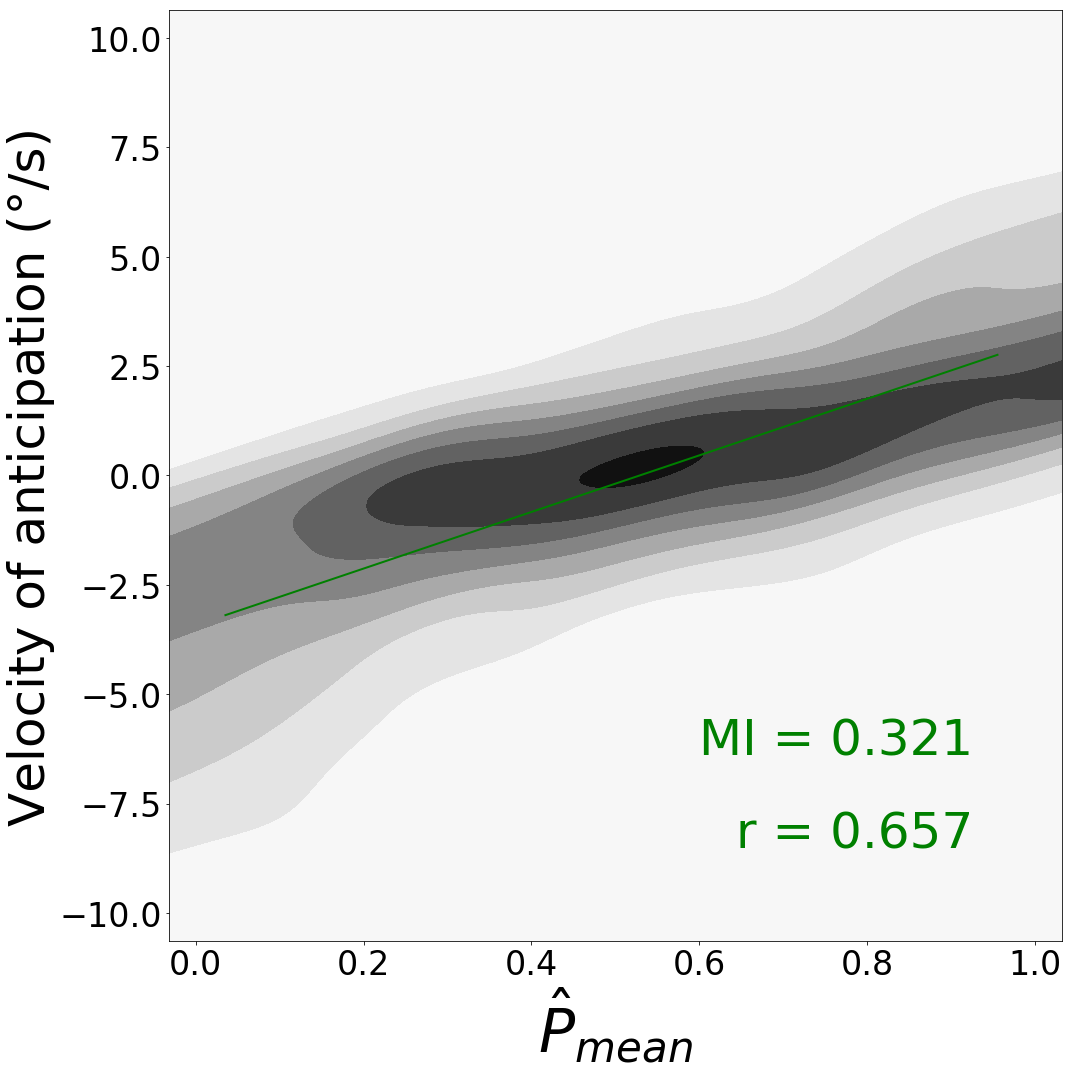

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width),constrained_layout=True)
axs = e.comparison(ax=axs, result='velocity', show='kde',
                   nb_point_kde=300j, **opt)
fig.tight_layout()
#for ext in exts: fig.savefig('ms/figures/4_A_result_psycho_velo_sigmo' + ext, dpi=dpi)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


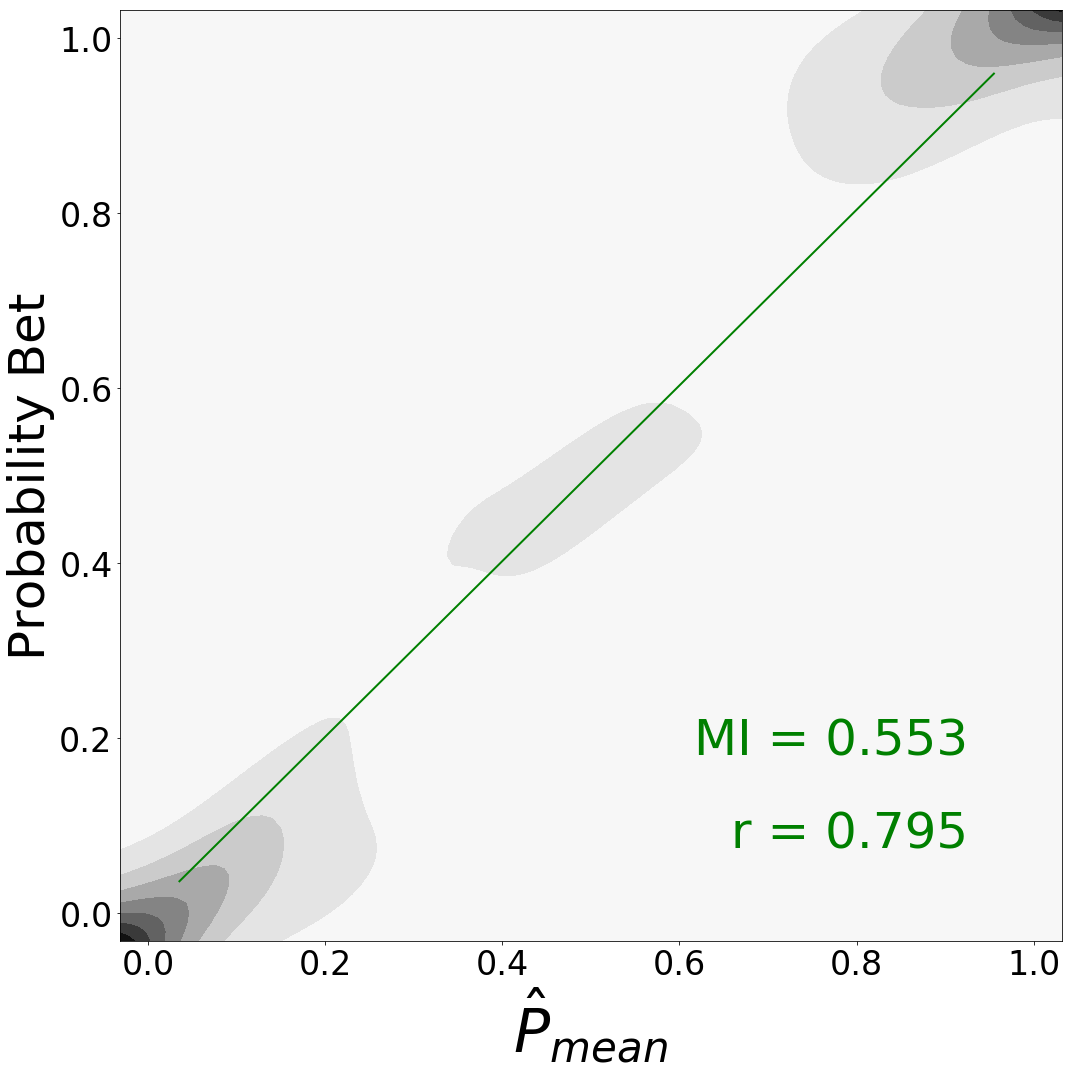

In [22]:
fig, axs = plt.subplots(1, 1, figsize=(fig_width, fig_width), constrained_layout=True)
axs = e.comparison(ax=axs, nb_point_kde=100j,  **opt)
fig.tight_layout()
#for ext in exts: fig.savefig('ms/figures/4_B_result_psycho_bet' + ext, dpi=dpi)

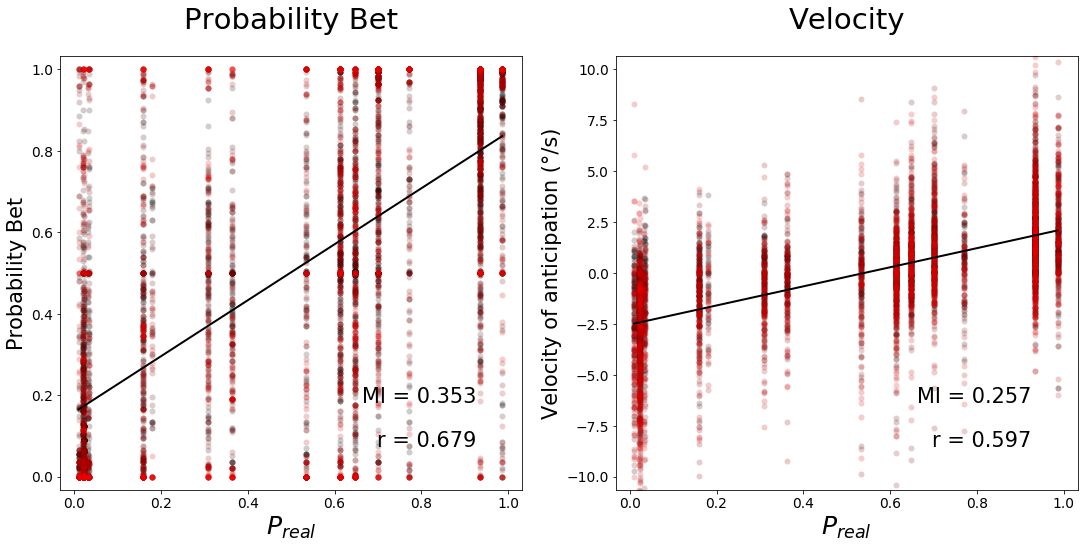

In [23]:
opt = dict(t_titre=35, t_label=25, conditional_kde=True, show='scatter', color_r='k')

fig, axs = plt.subplots(1, 2, figsize=(fig_width, fig_width/2), constrained_layout=True)

axs[0] = e.comparison(ax=axs[0], proba='real', **opt)
axs[1] = e.comparison(ax=axs[1], proba='real', result='velocity', **opt)


for ext in exts: fig.savefig('figures/Result/scatter_velocity_sigmo_real' + ext, dpi=dpi)
plt.show()


scatterKDE


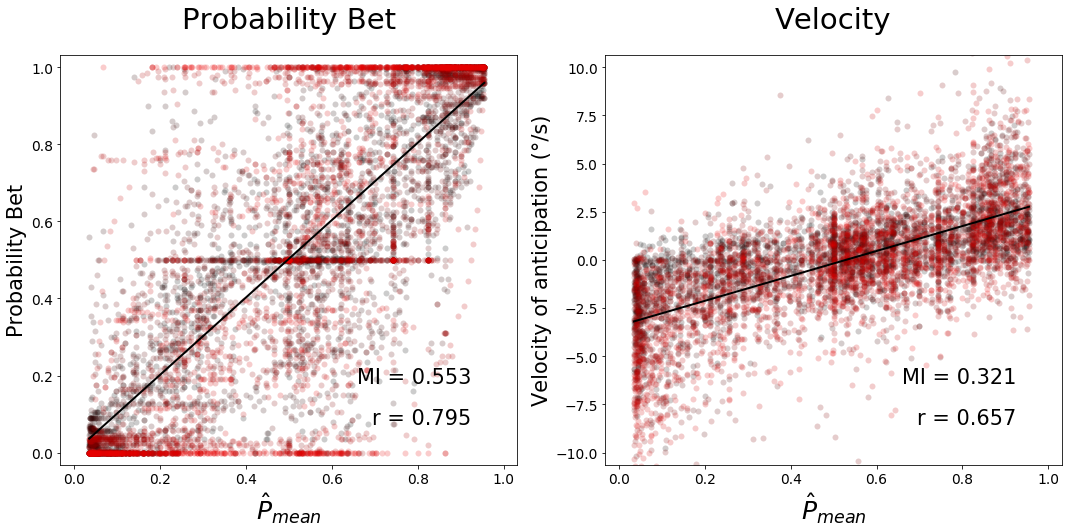

scatterKDE


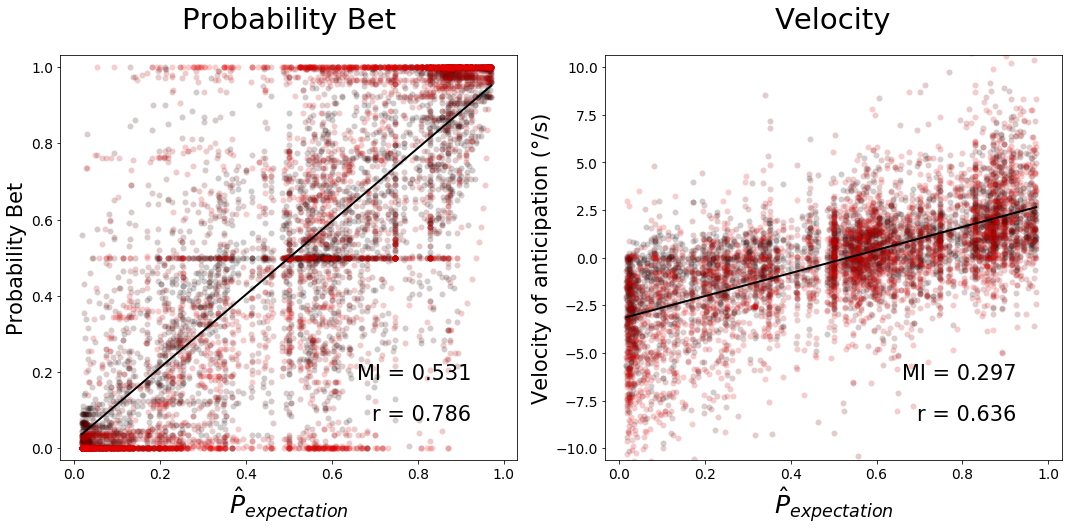

scatterKDE


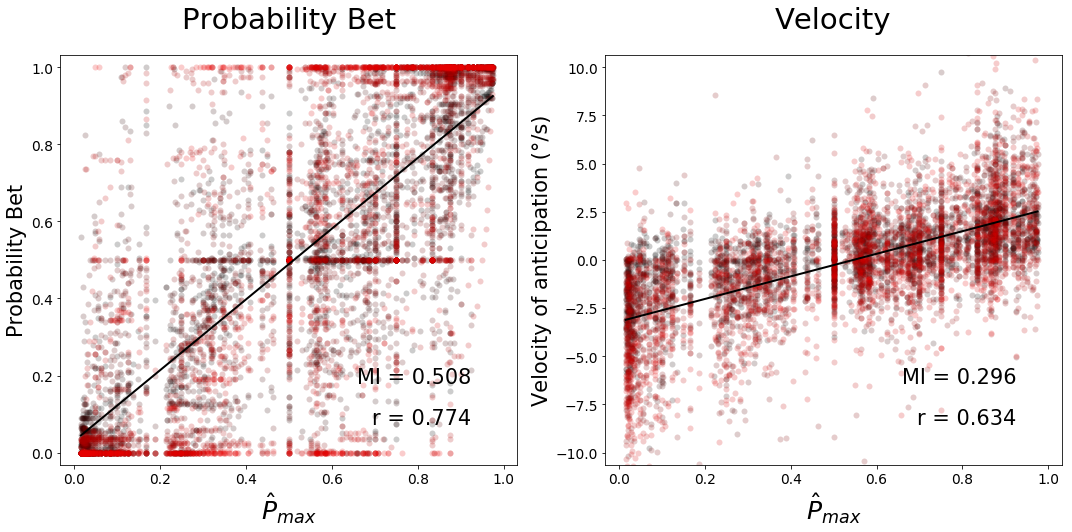

scatterKDE


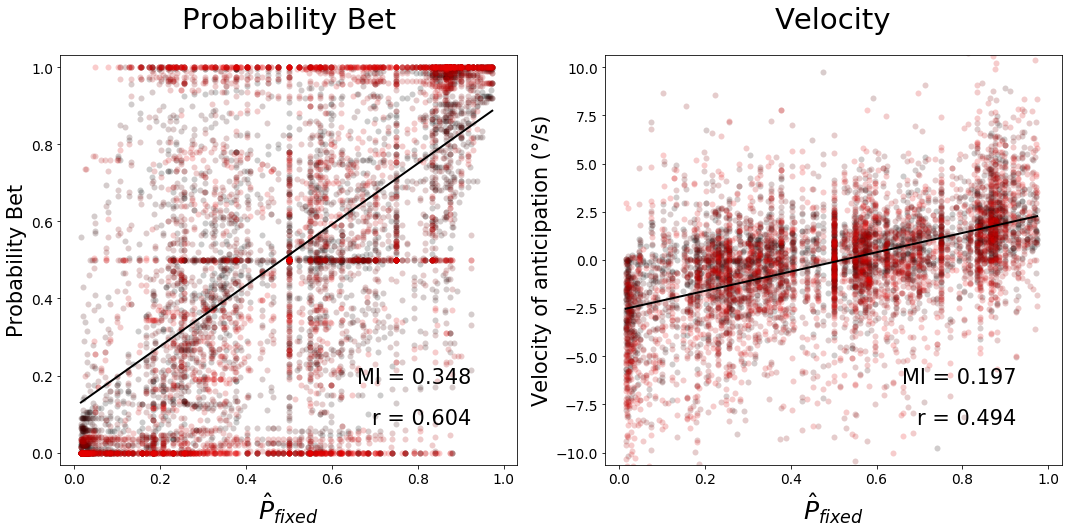

scatterKDE


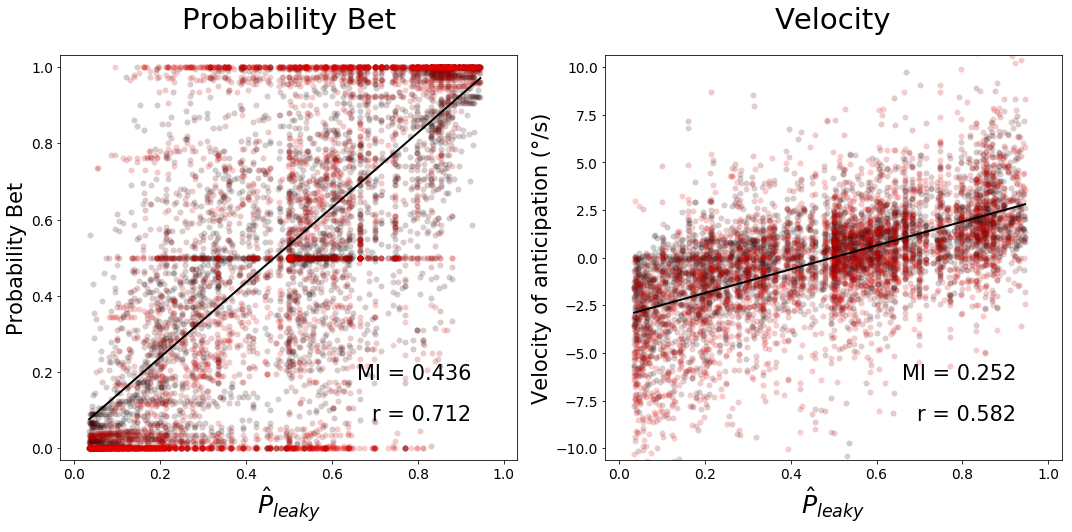

In [24]:
for mode in ['mean', 'expectation', 'max', 'fixed', 'leaky']:
    fig, ax = e.plot_results(mode_bcp=mode, plot='scatterKDE')
    plt.subplots_adjust(hspace=0.1)
    fig.tight_layout()
    for ext in exts: fig.savefig('figures/Result/scatter_velocity_sigmo_' + mode + ext, dpi=dpi)
    plt.show()


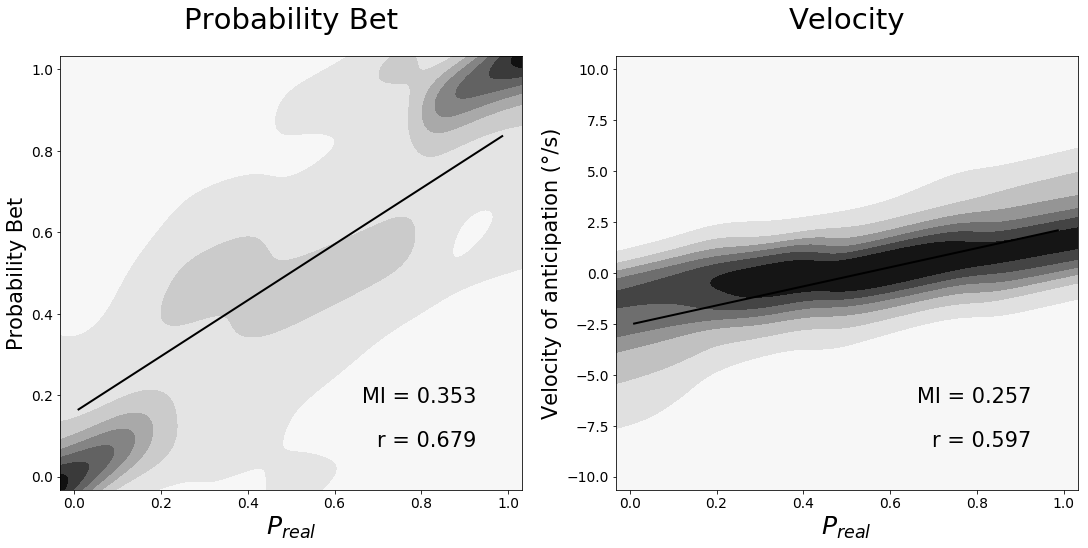

In [25]:
opt = dict(t_titre=35, t_label=25, conditional_kde=True, show='kde', color_r='k')

fig, axs = plt.subplots(1, 2, figsize=(fig_width, fig_width/2), constrained_layout=True)

axs[0] = e.comparison(ax=axs[0], proba='real', **opt)
axs[1] = e.comparison(ax=axs[1], proba='real', result='velocity', **opt)


for ext in exts: fig.savefig('figures/Result/kde_velocity_sigmo_real' + ext, dpi=dpi)
plt.show()


scatterKDE


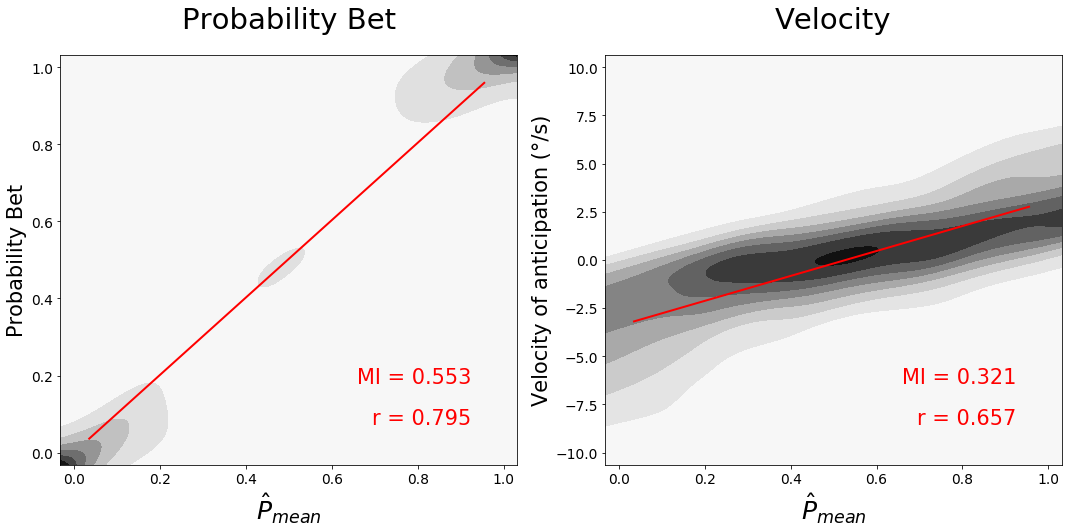

scatterKDE


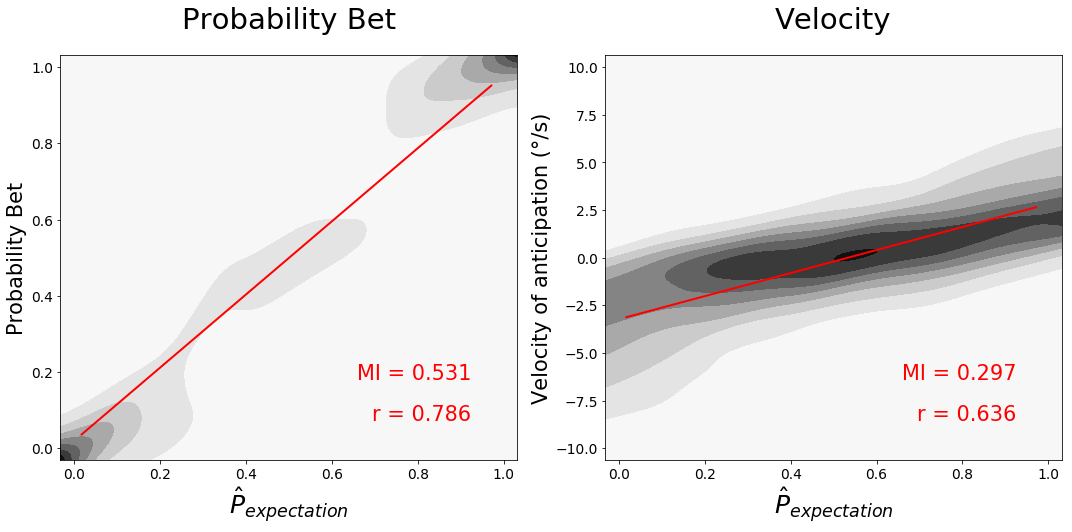

scatterKDE


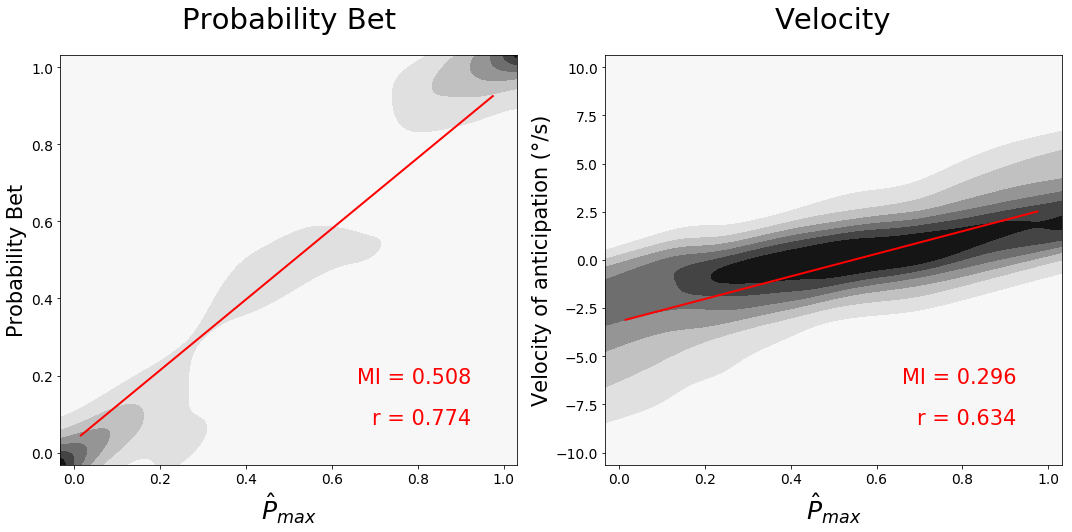

scatterKDE


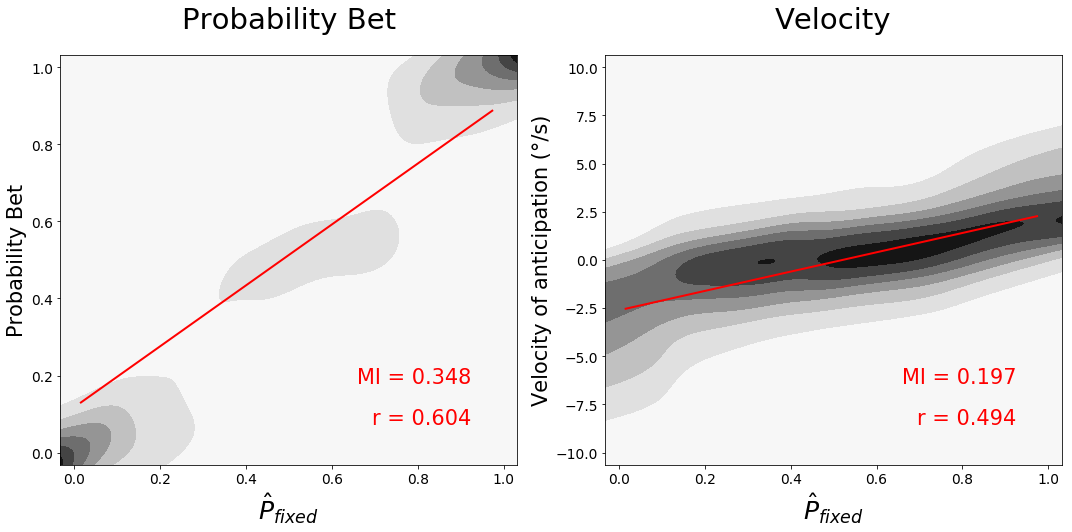

scatterKDE


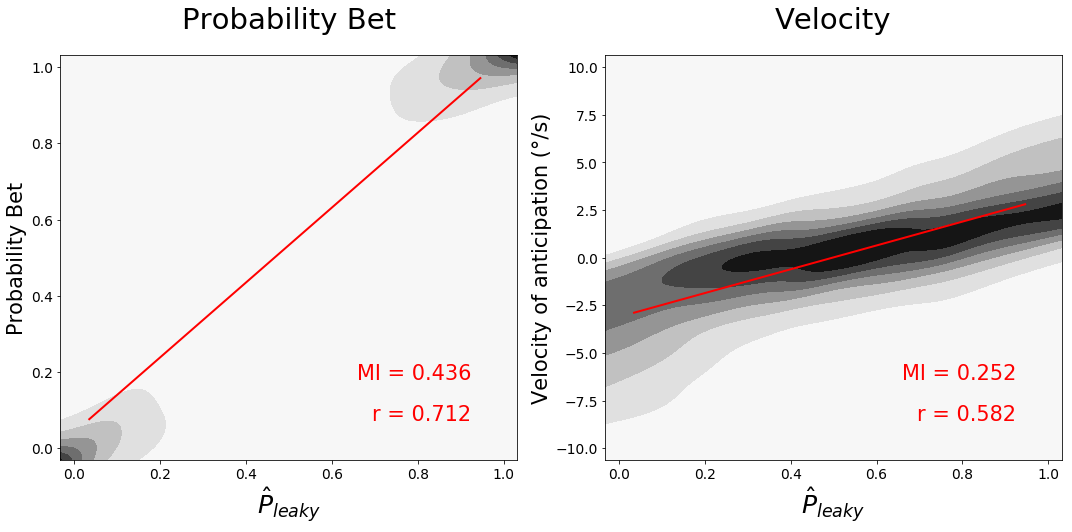

In [26]:
for mode in ['mean', 'expectation', 'max', 'fixed', 'leaky']:
    fig, axs = e.plot_results(mode_bcp=mode, plot='scatterKDE', show='kde')
    plt.subplots_adjust(hspace=0.1)
    fig.tight_layout()
    for ext in exts: fig.savefig('figures/Result/kde_mean_velocity_sigmo_' + mode + ext, dpi=dpi)
    plt.show()

sujet
Subject 6 = LB
Subject 10 = TN


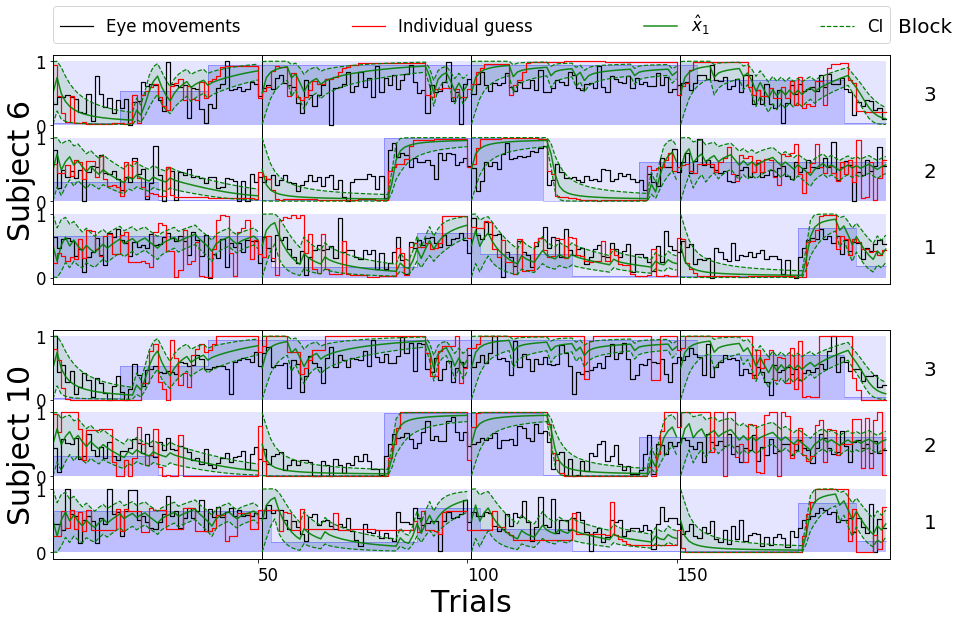

sujet
Subject 5 = IP
Subject 2 = CS


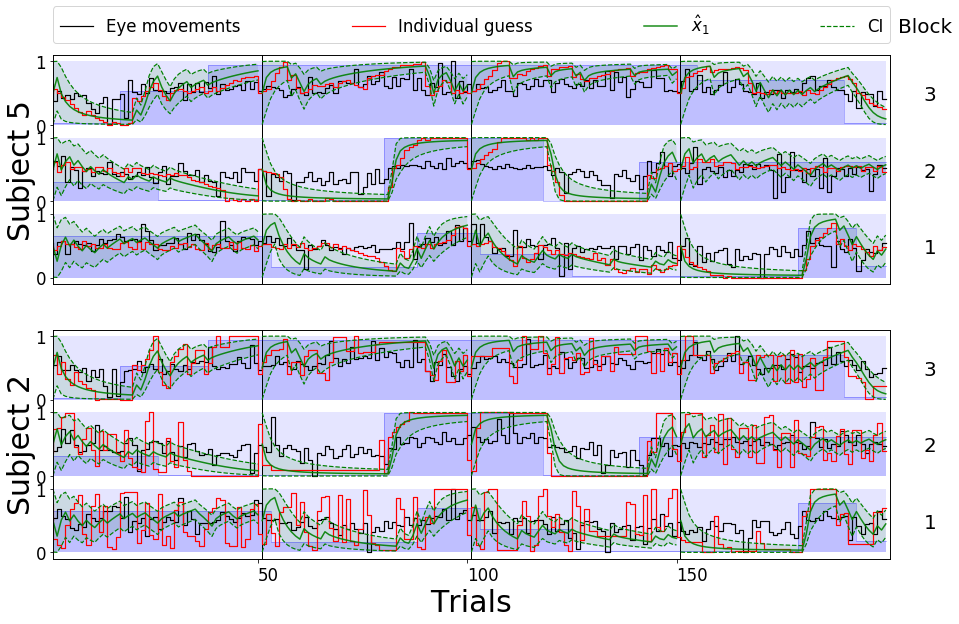

In [27]:
for i_sujet, sujet_ in enumerate([[6, 10], [5, 2]]):
    fig, axs = e.plot_results(sujet=sujet_, plot='sujet', color=color, alpha=alpha, color_bcp=color_bcp_mean, t_label=30)
    for ext in exts: fig.savefig('figures/Result/Results_BCP_velocity_sigmo_' + str(i_sujet) + ext, dpi=dpi)
    plt.show()

sujet+scatterKDE
Subject 6 = LB


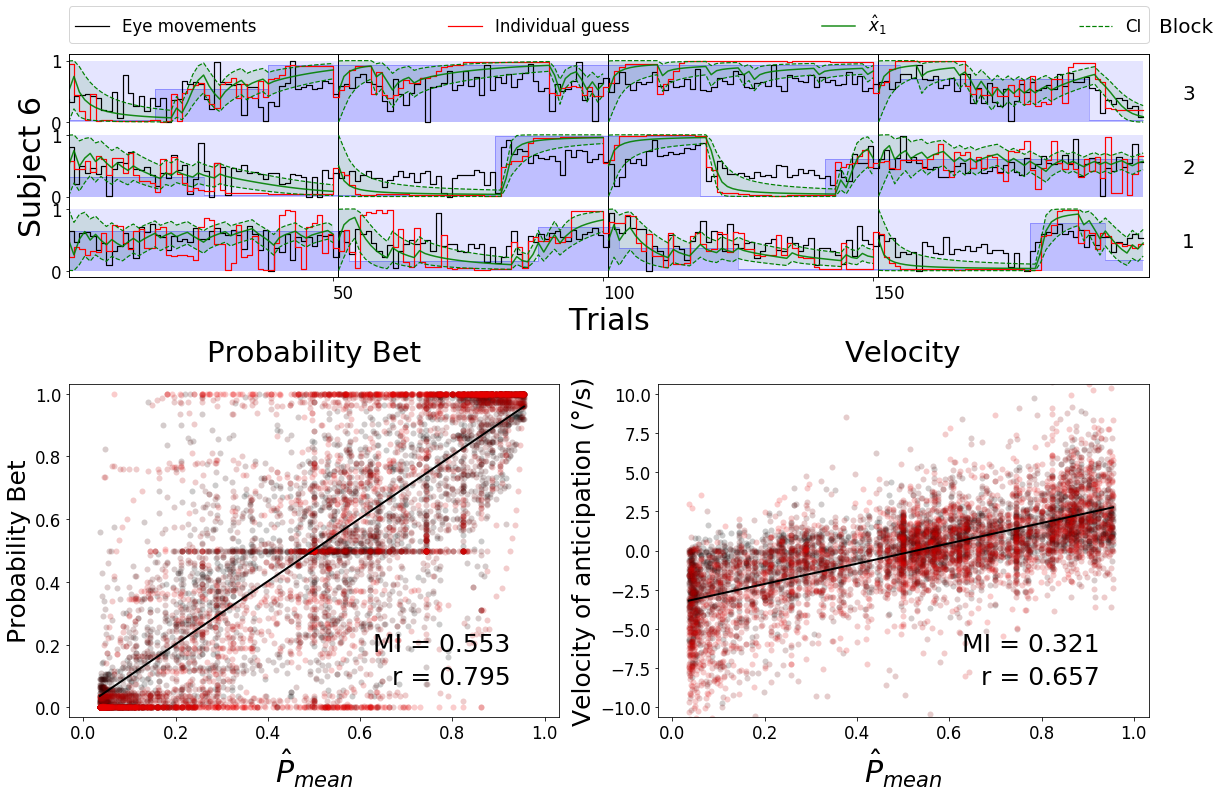

sujet+scatterKDE
Subject 10 = TN


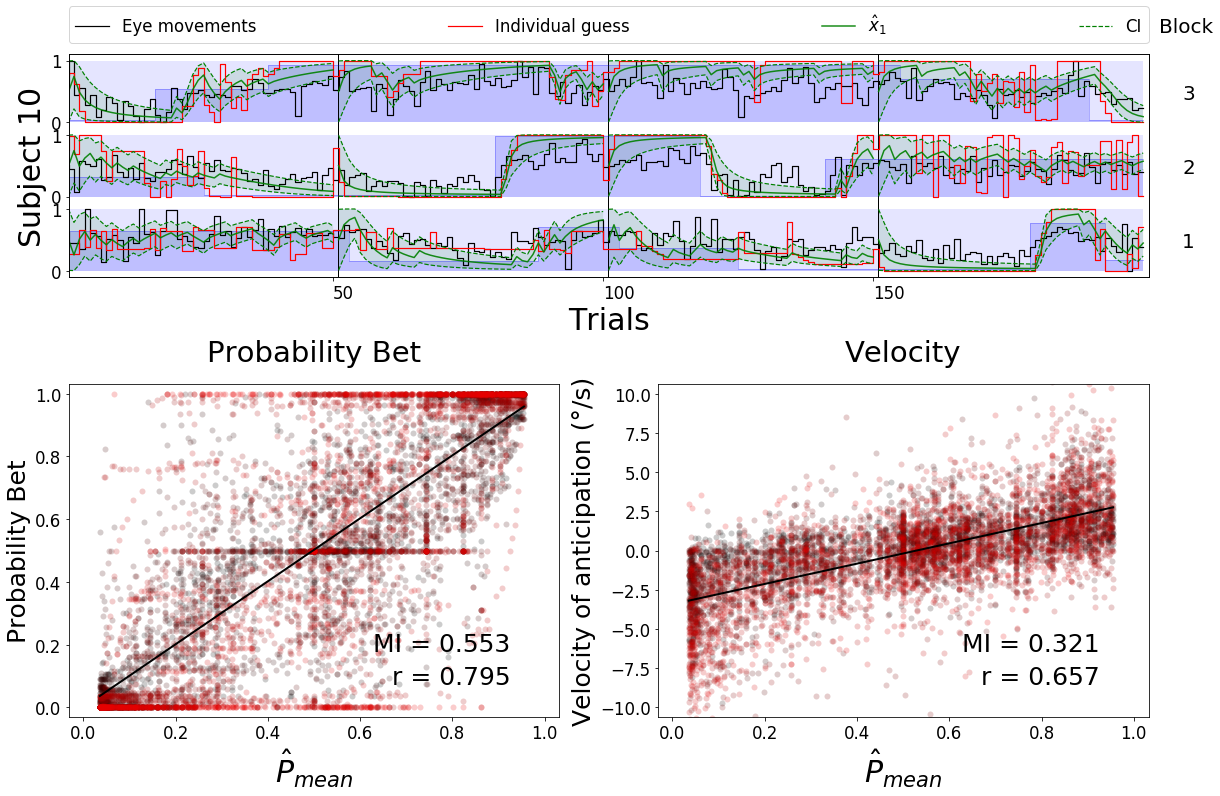

sujet+scatterKDE
Subject 5 = IP


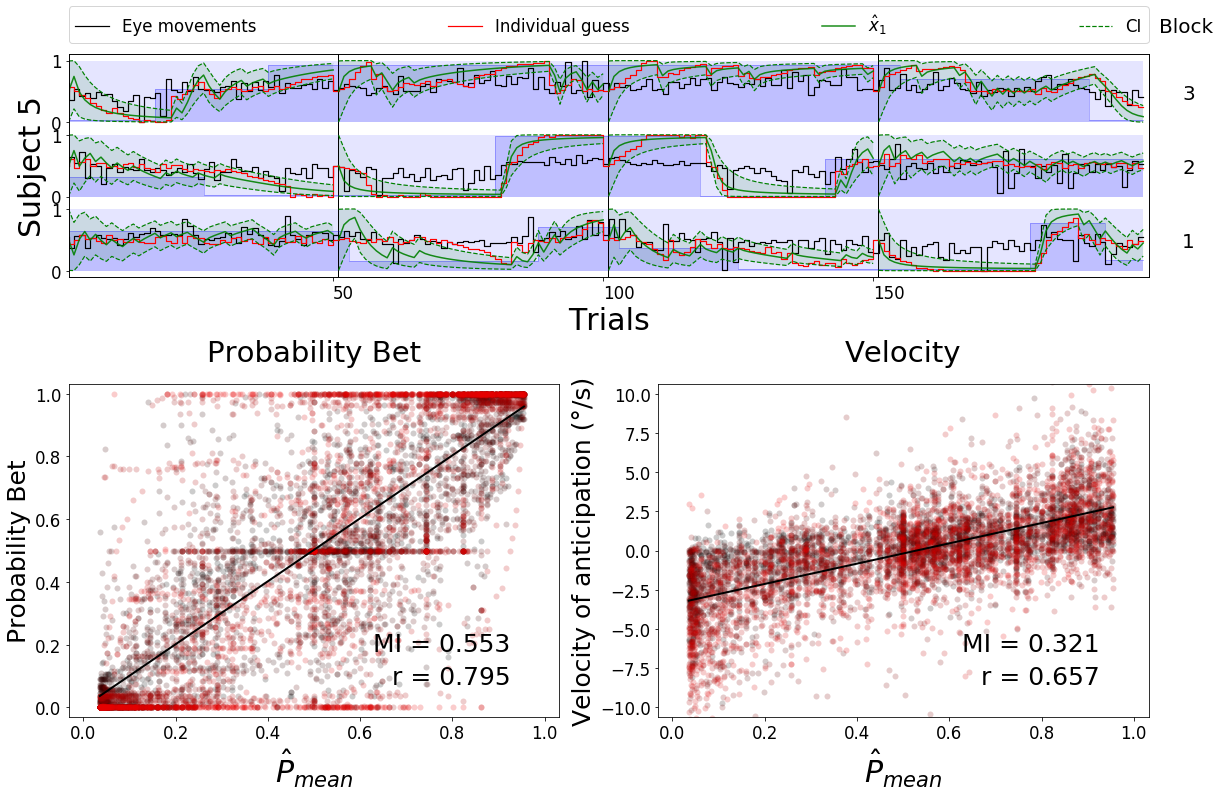

sujet+scatterKDE
Subject 2 = CS


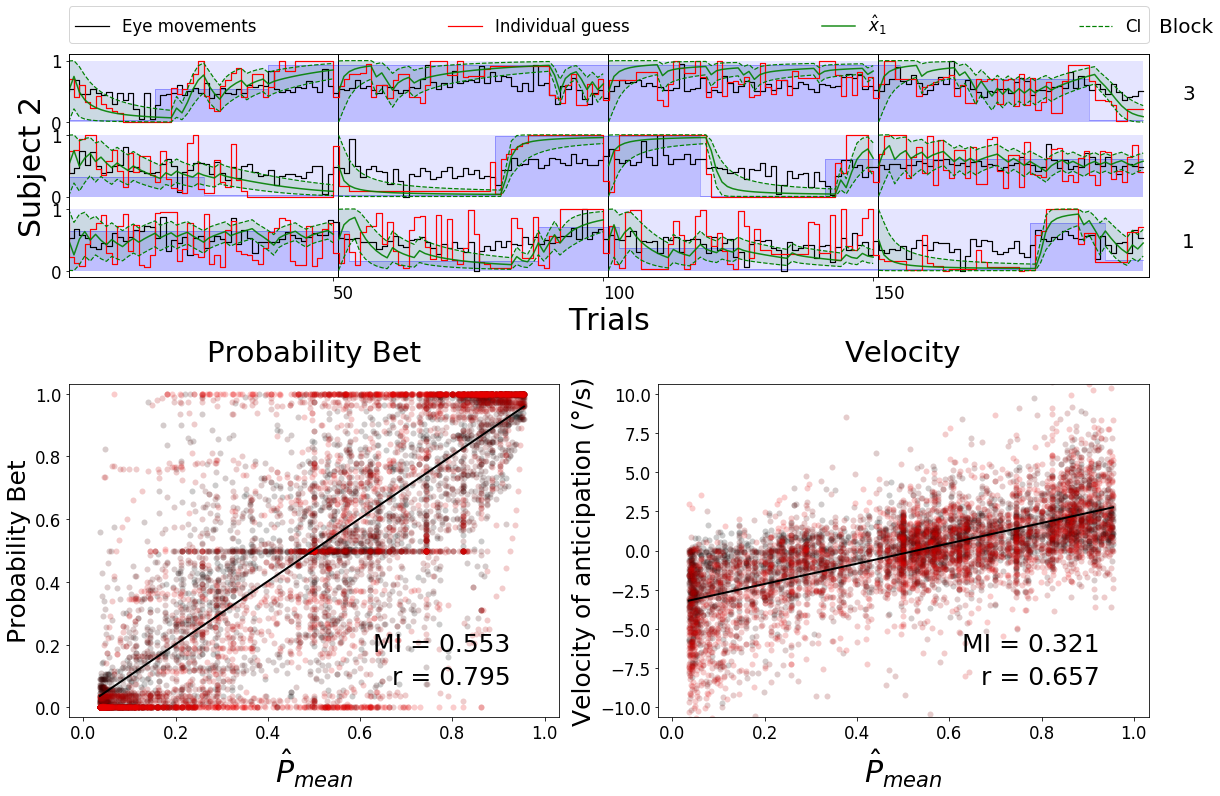

In [28]:
sujet = [6, 10, 5, 2]
for sujet_ in sujet:
    fig, axs = e.plot_results(sujet=[sujet_], color=color, alpha=alpha, color_bcp=color_bcp_mean, t_label=30)
    for ext in exts: fig.savefig('figures/Result/Results_BCP_velocity_sigmo_sujet_' + str(sujet_) + ext, dpi=dpi)
    plt.show()

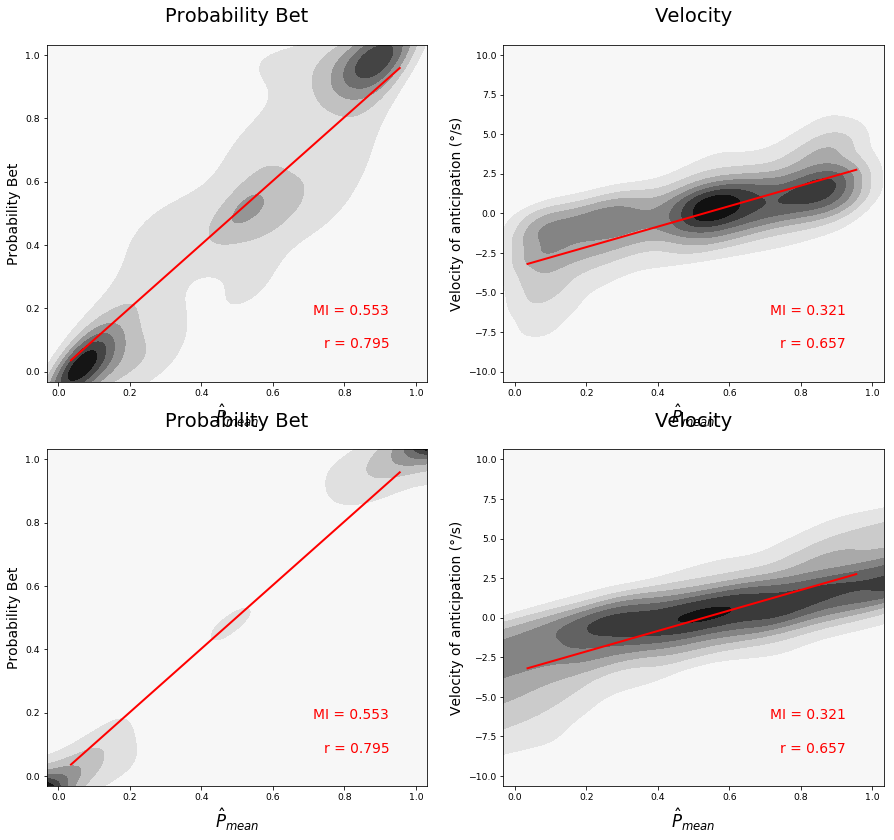

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(fig_width, 2*fig_width/2.2))
opt = {'t_titre':35/1.5, 't_label':25/1.5}

axs[0][0] = e.comparison(ax=axs[0][0], conditional_kde=False, **opt)
axs[0][1] = e.comparison(ax=axs[0][1], conditional_kde=False, result='velocity', **opt)

axs[1][0] = e.comparison(ax=axs[1][0], **opt)
axs[1][1] = e.comparison(ax=axs[1][1], result='velocity', **opt)